# download dataset

In [ ]:
# https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv
# https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.names

# Input categorical, output categorical

##  Chi-Squared Feature Selection

In [14]:
# example of chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    df = read_csv(filename)
    print("Geladene Daten:")
    print(df.head())
    
    # Clean column names by removing extra quotes
    df.columns = df.columns.str.replace("'", "").str.strip()
    
    # Check for the actual target column name
    if 'recurrence-events' not in df.columns:
        print("Fehler: Die Spalte 'recurrence-events' existiert nicht. Verfügbare Spalten sind:", df.columns)
        return None, None
    
    # split into input (X) and output (y) variables
    X = df.drop('recurrence-events', axis=1)  # Spalten außer 'recurrence-events' sind Eingabedaten (X)
    y = df['recurrence-events']  # Die Spalte 'recurrence-events' ist unsere Zielvariable (y)

    # format all fields as string (optional)
    for column in df.columns:
        df[column] = df[column].astype(str)
    
    return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=10)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# main process
def main():
    # load the dataset
    X, y = load_dataset('breast-cancer.csv')
    
    # Check if dataset is loaded correctly
    if X is None or y is None:
        return
    
    # split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    
    # prepare input data
    X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
    
    # prepare output data
    y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
    
    # feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
    
    # what are scores for the features
    print("Feature Scores:")
    for i in range(len(fs.scores_)):
        print(f'Feature {i}: {fs.scores_[i]}')
    
    # plot the scores
    pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
    pyplot.xlabel('Feature Index')
    pyplot.ylabel('Chi-Squared Score')
    pyplot.title('Feature Importance Scores')
    pyplot.show()
    
    # fit the model
    model = LogisticRegression()
    model.fit(X_train_fs, y_train_enc)
    
    # make predictions
    y_pred = model.predict(X_test_fs)
    
    # evaluate the model
    accuracy = accuracy_score(y_test_enc, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

if __name__ == "__main__":
    main()


Geladene Daten:
   '40-49'  'premeno'  '15-19'  '0-2'  'yes'  '3'  'right'   'left_up'   'no'  \
0  '50-59'     'ge40'  '15-19'  '0-2'   'no'  '1'  'right'   'central'   'no'   
1  '50-59'     'ge40'  '35-39'  '0-2'   'no'  '2'   'left'  'left_low'   'no'   
2  '40-49'  'premeno'  '35-39'  '0-2'  'yes'  '3'  'right'  'left_low'  'yes'   
3  '40-49'  'premeno'  '30-34'  '3-5'  'yes'  '2'   'left'  'right_up'   'no'   
4  '50-59'  'premeno'  '25-29'  '3-5'   'no'  '2'  'right'   'left_up'  'yes'   

      'recurrence-events'  
0  'no-recurrence-events'  
1     'recurrence-events'  
2  'no-recurrence-events'  
3     'recurrence-events'  
4  'no-recurrence-events'  


ValueError: Found unknown categories ["'24-26'"] in column 3 during transform

##  Mutual Information Feature Selection

Feature 0: 0.015162
Feature 1: 0.052764
Feature 2: 0.048804
Feature 3: 0.015907
Feature 4: 0.000000
Feature 5: 0.000000
Feature 6: 0.000000
Feature 7: 0.055397
Feature 8: 0.000000


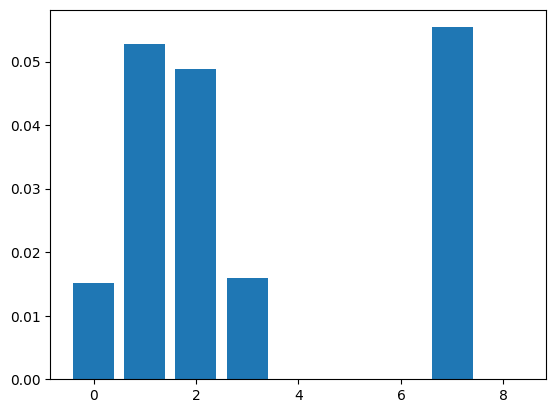

In [2]:
# example of mutual information feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    
    # retrieve numpy array
    
    # split into input (X) and output (y) variables
    
    # format all fields as string
    

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
    

# load the dataset

# split into train and test sets

# prepare input data

# prepare output data

# feature selection

# what are scores for the features

# plot the scores



#  Model Built Using All Features

In [42]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load the dataset


# prepare input data


# prepare target


# load the dataset

# split into train and test sets

# prepare input data

# prepare output data

# fit the model

# evaluate the model

# evaluate predictions


Accuracy: 75.79


# Model Built Using Chi-Squared Features

In [37]:
# evaluation of a model fit using chi squared input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load the dataset


# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
    

# load the dataset

# split into train and test sets

# prepare input data

# prepare output data

# feature selection

# fit the model

# evaluate the model

# evaluate predictions


Accuracy: 74.74


# Model Built Using Mutual Information Features

In [46]:
# evaluation of a model fit using mutual information input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load the dataset
def load_dataset(filename):
    

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
    

# load the dataset

# split into train and test sets

# prepare input data

# prepare output data

# feature selection

# fit the model

# evaluate the model

# evaluate predictions


Accuracy: 73.68
